## Frequency Distribution of Node Colors by Weisfeiler Lehman


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx

In [2]:
def load_graph(file):
    data = file.values
    G = nx.Graph()
    
    for i in range(len(data)):
        G.add_edge(data[i,0], data[i,1])
    return G

In [3]:
dppin=pd.read_csv('../Data/dppintarrasov.txt')

In [4]:
dppin.head()

,src,trg,time,exp
0,14,600,0,0.9801
1,22,465,0,0.6732
2,22,651,0,0.6732
3,28,211,0,0.9405
4,41,695,0,0.4624


In [5]:
G = load_graph(dppin)

In [6]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [7]:
dppinwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [8]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(dppinwldf.value_counts())

In [9]:
countswl

array([114,  22,  11,   7,   6,   6,   5,   4,   4,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [10]:
# number of unique colors
list(countswl).count(1)

567

In [11]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

648

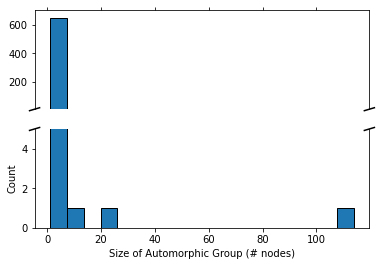

In [12]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(countswl, bins=18, edgecolor='black')
ax2.hist(countswl, bins=18, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(10, 700)  # outliers only
ax2.set_ylim(0, 5)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
plt.show()
#plt.savefig('DPPINDistWL.pdf', bbox_inches='tight')

## Facebook

In [13]:
facebook = pd.read_csv('../Data/facebook.csv')

In [14]:
facebook.head()

,src,trg,time
0,12830,14791,1.147169e+09
1,11072,21587,1.147170e+09
2,12830,14797,1.147170e+09
3,1084,6297,1.147170e+09
4,9089,2304,1.147171e+09


In [15]:
G = load_graph(facebook)

In [16]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [17]:
fbwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [18]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(fbwldf.value_counts())

In [19]:
countswl

array([492, 112,  56, ...,   1,   1,   1])

In [20]:
# number of unique colors
list(countswl).count(1)

2744

In [21]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

3030

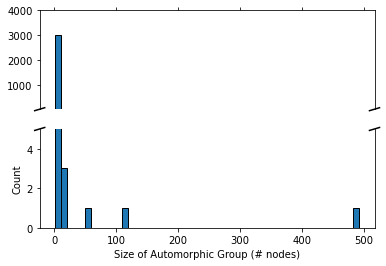

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(countswl, bins=50, edgecolor='black')
ax2.hist(countswl, bins=50, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(10, 4000)  # outliers only
ax2.set_ylim(0, 5)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
plt.show()
#plt.savefig('FBDistWL.pdf', bbox_inches='tight')

## UCI

In [23]:
uci = pd.read_csv('../Data/uci_graph.csv')

In [24]:
uci.head()

,src,trg,time
0,1,2,1082008561
1,3,4,1082123439
2,5,2,1082381991
3,6,7,1082407219
4,8,7,1082407356


In [25]:
G = load_graph(uci)

In [26]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [27]:
uciwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [28]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(uciwldf.value_counts())

In [29]:
# number of unique colors
list(countswl).count(1)

1664

In [30]:
countswl

array([14, 14, 12, ...,  1,  1,  1])

In [31]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

1721

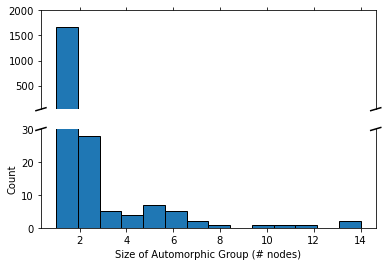

In [32]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(countswl, bins=14, edgecolor='black')
ax2.hist(countswl, bins=14, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(30, 2000)  # outliers only
ax2.set_ylim(0, 30)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
plt.show()
#plt.savefig('UCIDistWL.pdf', bbox_inches='tight')

## AS

In [33]:
asdata = pd.read_csv('../Data/AS_dataset.csv')

In [34]:
asdata.head()

,src,trg,time
0,1,701,19990824
1,1,7018,19990824
2,1,1673,19990824
3,1,2914,19990824
4,1,1239,19990824


In [35]:
G = load_graph(asdata)

In [36]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [37]:
aswldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [38]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(aswldf.value_counts())

In [39]:
# number of unique colors
list(countswl).count(1)

3744

In [40]:
countswl

array([217,  78,  74, ...,   1,   1,   1])

In [41]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

4355

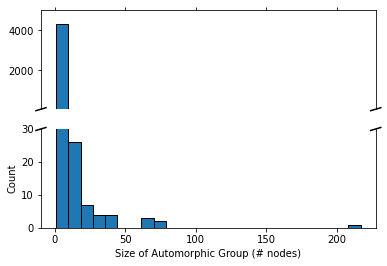

In [42]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(countswl, bins=25, edgecolor='black')
ax2.hist(countswl, bins=25, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(50, 5000)  # outliers only
ax2.set_ylim(0, 30)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
plt.show()
#plt.savefig('ASDistWL.pdf', bbox_inches='tight')

## Bitcoin

In [43]:
otc = pd.read_csv('../Data/bitcoin_otc_graph.csv')

In [44]:
otc.head()

,src,trg,time,edgelab
0,6,2,1.289242e+09,4
1,6,5,1.289242e+09,2
2,1,15,1.289243e+09,1
3,4,3,1.289245e+09,7
4,13,16,1.289254e+09,8


In [45]:
G = load_graph(otc)

In [46]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [47]:
otcwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [48]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(otcwldf.value_counts())

In [49]:
# number of unique colors
list(countswl).count(1)

3801

In [50]:
countswl

array([299, 115,  70, ...,   1,   1,   1])

In [51]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

4170

<function matplotlib.pyplot.show(close=None, block=None)>

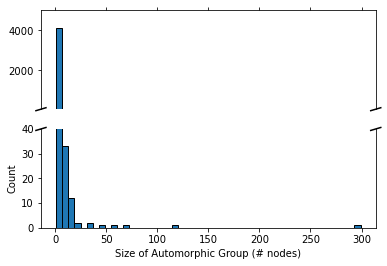

In [52]:
import matplotlib.pyplot as plt
import numpy as np


# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.hist(countswl, bins=50, edgecolor='black')
ax2.hist(countswl, bins=50, edgecolor='black')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(50, 5000)  # outliers only
ax2.set_ylim(0, 40)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#ax.set_title('Distribution of Sizes of Automorphic Groups')
plt.xlabel('Size of Automorphic Group (# nodes)')
plt.ylabel('Count')
plt.show
#plt.savefig('OTCDistWL.pdf', bbox_inches='tight')

## Hospital

In [53]:
hospital = pd.read_csv('../Data/hospital.csv')

In [54]:
hospital.head()

,src,trg,time
0,1157,1232,140
1,1157,1191,160
2,1157,1159,500
3,1157,1159,520
4,1159,1191,560


In [55]:
G = load_graph(hospital)

In [56]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [57]:
hospwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [58]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(hospwldf.value_counts())

In [59]:
# number of unique colors
list(countswl).count(1)

75

In [60]:
countswl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

75

## High School

In [62]:
high = pd.read_csv('../Data/highschool.csv')

In [63]:
high.head()

,src,trg,time
0,1170,1644,1353303380
1,1170,1613,1353303400
2,1170,1644,1353303640
3,1181,1651,1353303760
4,1108,1190,1353303840


In [64]:
G = load_graph(high)

In [65]:
# G_hashes gets WL "colors"
G_hashes = nx.weisfeiler_lehman_subgraph_hashes(G, iterations=20, digest_size=16)

In [66]:
highwldf = pd.DataFrame.from_dict(G_hashes, orient='index')

In [67]:
#size of each automorphic group (as determined by WL colors)
countswl = np.array(highwldf.value_counts())

In [68]:
# number of unique colors
list(countswl).count(1)

180

In [69]:
countswl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [70]:
# number of different automorphic groups (as determined by WL colors)
len(countswl)

180